In [8]:
%pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB 2.6 MB/s eta 0:02:23
   ---------------------------------------- 0.2/377.0 MB 3.7 MB/s eta 0:01:41
   ---------------------------------------- 0.7/377.0 MB 5.5 MB/s eta 0:01:09
   ---------------------------------------- 1.7/377.0 MB 10.1 MB/s eta 0:00:38
   ---------------------------------------- 2.0/377.0 MB 11.4 MB/s eta 0:00:33
   ---------------------------------------- 3.3/377.0 MB 12.5 MB/s eta 0:00:30
   ---------------------------------------- 3.9/377.0 MB 12.9 MB/s eta 0:00:29
   ---------------------------------------- 4.5/377.0 MB 12.6 MB/s eta 0:00:30
    --------------------------------------- 4.8/377.0 MB 12.2 MB/s eta 0:00:31
    --------------------------------------- 5.7/377.0 MB 13.0 MB/s eta 0:00:29
    --------------------------------------- 6.5/377.0 MB 13.0 MB/s eta 0:00:29
    --------------------------------------- 6.7/377.0 MB 13.0 M

In [6]:
#!pip install opencv-python
#!pip install --user tqdm

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import copy
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras_vggface.vggface import VGGFace
from keras_vggface import utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd
import cv2
import scipy.misc
import matplotlib.pyplot as plt
from tqdm import tqdm

Augmented data

In [7]:
base_path = '../real_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True)
batch_size = 64
train_flow= image_gen.flow_from_directory(
    base_path + 'train/',
    target_size = (224, 224),
    batch_size = batch_size,
    class_mode ='binary'
)


image_gen1 = ImageDataGenerator(rescale=1./255.)
valid_flow = image_gen1.flow_from_directory(
    base_path + 'valid/',
    target_size = (224, 224),
    batch_size = batch_size,
    class_mode = 'binary'
)
test_flow = image_gen1.flow_from_directory(
    base_path + 'test/',
    target_size = (224, 224),
    batch_size = 1,
    shuffle = False,
    class_mode ='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [9]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
"""
    Propsoed CNN architecture.
    
"""

model = Sequential()

# Pamameters Initialization
input_shape = (224,224,3)
activation = 'relu'
padding = 'same'
droprate = 0.1
epsilon = 0.001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))


model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters =128, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=512, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(GlobalAveragePooling2D())
#model.add(Flatten())
#model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
          
#model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dropout(droprate))
model.add(Dense(1, activation='sigmoid'))

model.summary() # Summary of the architecture

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                      

In [10]:
# Parameters Initialization
from keras.optimizers import rmsprop,SGD,Adam,Adadelta

#opt = rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='binary_crossentropy',optimizer=Adam(0.0001), metrics=['accuracy'])

In [11]:
train_steps = 40000//batch_size
valid_steps = 5000//batch_size
history = model.fit_generator(
    train_flow,
    epochs=10,
    steps_per_epoch=train_steps,
    validation_data=valid_flow,
    validation_steps=valid_steps
)

C:\Users\kanko\AppData\Local\Temp\ipykernel_24904\4208699335.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 758s 1s/step - loss: 0.5937 - accuracy: 0.6841 - val_loss: 0.6918 - val_accuracy: 0.6396
Epoch 2/10
625/625 [==============================] - 681s 1s/step - loss: 0.5161 - accuracy: 0.7446 - val_loss: 0.6251 - val_accuracy: 0.6965
Epoch 3/10
625/625 [==============================] - 655s 1s/step - loss: 0.4727 - accuracy: 0.7748 - val_loss: 0.4543 - val_accuracy: 0.7810
Epoch 4/10
625/625 [==============================] - 651s 1s/step - loss: 0.4319 - accuracy: 0.7996 - val_loss: 0.4691 - val_accuracy: 0.7831
Epoch 5/10
625/625 [==============================] - 647s 1s/step - loss: 0.4075 - accuracy: 0.8151 - val_loss: 0.5755 - val_accuracy: 0.7428
Epoch 6/10
625/625 [==============================] - 647s 1s/step - loss: 0.3801 - accuracy: 0.8317 - val_loss: 0.4307 - val_accuracy: 0.8079
Epoch 7/10
625/625 [==============================] - 648s 1s/step - loss: 0.3609 - accuracy: 0.8394 - val_loss: 0.4556 - val_accuracy: 0.7929

In [12]:
model.save("custom_augmented_model.h5")

In [14]:
"""
Plot the training and validation loss
epochs - list of epoch numbers
loss - training loss for each epoch
val_loss - validation loss for each epoch
"""
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
"""
Plot the training and validation accuracy
epochs - list of epoch numbers
acc - training accuracy for each epoch
val_acc - validation accuracy for each epoch
"""
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

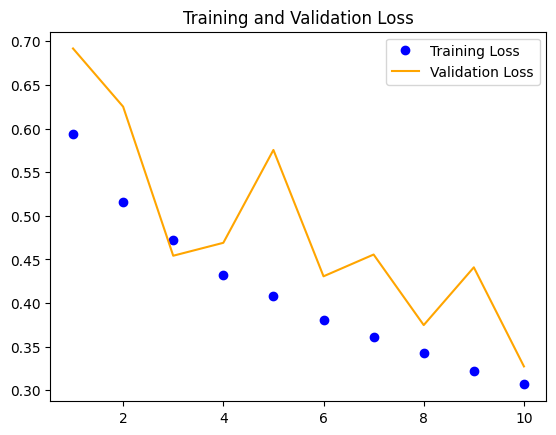

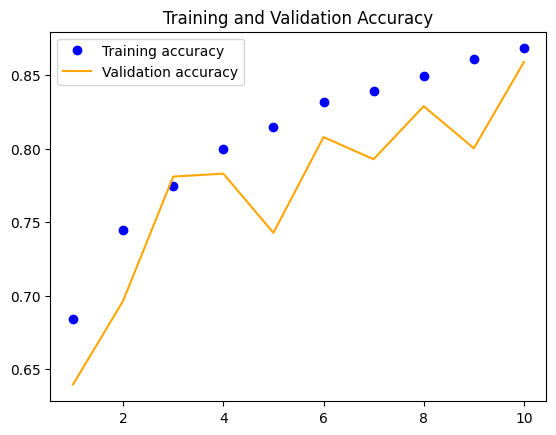

In [16]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [17]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

20000/20000 [==============================] - 191s 10ms/step


In [18]:
from sklearn import metrics

In [20]:
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))

ROC AUC Score: 0.9584770100000001
AP Score: 0.9562884734528818

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     10000
           1       0.95      0.75      0.84     10000

    accuracy                           0.85     20000
   macro avg       0.87      0.85      0.85     20000
weighted avg       0.87      0.85      0.85     20000

